In [1]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd

C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\kunaual\anaconda3\envs\PythonData\lib\site-

In [2]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
import cv2
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing import image

In [4]:
#set up file and df to store accuracy and loss of modelfit epochs
#commented out after creating the df for all 8 optimizers
# file = "modelfit_history.csv"
# modelfit_hist_df = pd.read_csv(file)

In [5]:
# modelfit_hist_df

In [6]:
## the kaggle zip file extract put the files in folders for each note type
# to simplify the below code, all files were copied out of their subdirectories into single "Images" folder. 
#Images folder is part of gitignore
counter = 0 #for testing/break purposes only
img_data_array=[]
class_name=[]
folder_name = "Images"
#This code based on https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6
for file in os.listdir(os.path.join(folder_name)):
    counter +=1
    image_path= os.path.join(folder_name,  file)
    image= cv2.imread( image_path, cv2.IMREAD_GRAYSCALE)
    #image=np.array(image)  ????
#     print(image.shape)
    image = image.astype('float32')
    image /= 255 #this gets black and white to 1s and 0s 
    img_data_array.append(image)
    note_class = file[0:1]
#     print(note_class)
    class_name.append(note_class)
#    if (counter>5):
#        break;


In [7]:
def create_dataset(notes_folder):
    class_name = []
    img_data_array = []
    
    for note_dir in os.listdir(notes_folder):
        
        for file in os.listdir(os.path.join(notes_folder, note_dir)):
            image = os.path.join(notes_folder, note_dir, file)
            image = cv2.imread(notes_folder, cv2.COLOR_BGR2RGB)
            #image = cv2.resize( image, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
            #image = np.array(image)  # converts the image to a numpy array
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(note_dir)
            
    print(img_data_array[0])
    return img_data_array, class_name

In [8]:
# Assigning a unique number to each class
note_classifier_dict = {key:value for value, key in enumerate(np.unique(class_name))}

In [9]:
note_classifier_dict

{'e': 0, 'h': 1, 'q': 2, 's': 3, 'w': 4}

In [10]:
# This is y, converting the class names to a numeric value

target_val=  [note_classifier_dict[class_name[i]] for i in range(len(class_name))]

In [11]:
# target_val

In [12]:
# Examine the image array ... setting the threshold to 4096 or above avoids truncating the array

np.set_printoptions(threshold=4096)
img_data_array[0]

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1. 

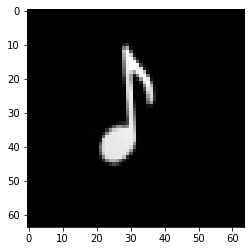

In [13]:
#test to make sure our images are still good.
import matplotlib.pyplot as plt
plt.imshow(img_data_array[10], cmap=plt.cm.Greys)

In [14]:
# flatten the 64x64 pixels in to a 1D array 
#similar to what was done in MNIST class example
num_dimensions = 64*64

#need to make this an np array so we can use reshape
x=np.array(img_data_array, np.float32)

reshape_test = x.reshape(x.shape[0],num_dimensions)

In [15]:
reshape_test.shape

(5000, 4096)

In [16]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(reshape_test,target_val, random_state=42)

## Scaling and Normalization

In [17]:
##### We performed the scaling manually above using 'image /= 255' #####
# Next, we normalize our training data to be between 0 and 1
# scaler = MinMaxScaler().fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [18]:
# X_train[0]

## One-Hot Encoding

In [19]:
# Our Training and Testing labels are integer encoded from 0 to 4
y_train[:20]

[4, 3, 0, 0, 1, 4, 4, 2, 4, 0, 2, 2, 1, 1, 1, 1, 3, 1, 4, 0]

In [20]:

num_classes = 5
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_train[0]

array([0., 0., 0., 0., 1.], dtype=float32)

## Building our Model


In [21]:
# Create an empty sequential model
model = Sequential()

In [22]:
# Add the first layer where the input dimensions are the 4096 pixel values
# Activation function ... starting with 'relu'
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Add a second hidden layer with 100 densely connected nodes

In [23]:
model.add(Dense(100, activation='relu'))

### Final output layer uses softmax activation function for logistic regression

In [24]:
model.add(Dense(num_classes, activation='softmax'))

### Model Summary

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               409700    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 505       
Total params: 420,305
Trainable params: 420,305
Non-trainable params: 0
_________________________________________________________________


### Compile and Train our Model 

In [26]:
optimizer = "Adam"
# optimizer = "SGD"
# optimizer = "RMSprop"
# optimizer = "Adadelta"
# optimizer = "Adagrad"
# optimizer = "Adamax"
# optimizer = "Nadam"
# optimizer = tf.keras.optimizers.Ftrl(learning_rate=.001)

In [27]:
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train (fit) our model using the training data

In [28]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=0
    )

KeyboardInterrupt: 

In [ ]:
#modelfit_hist_df=pd.DataFrame()   #only needed for first run
# modelfit_hist_df["ftrl_loss"] = history.history['loss']  #only needed for last one
# modelfit_hist_df["ftrl_acc"] = history.history['acc']   #only needed for last one

In [ ]:
# modelfit_hist_df[optimizer+"_loss"] = history.history['loss']
# modelfit_hist_df[optimizer+"_acc"] = history.history['acc']

In [ ]:
# modelfit_hist_df #test output

In [ ]:
# modelfit_hist_df.to_csv(file, index=False)

In [ ]:
#history.model #testing output

In [ ]:
# identify visualizations

In [ ]:
plt.plot(history.history['loss'], label='Loss (training data)')
# plt.plot(history.history['acc'], label='MAE (validation data)')
plt.plot(history.history['acc'], label='Accuracy (training data)')
plt.title('Loss and Accuracy vs. Epochs - Optimizer: '+ optimizer)
plt.ylabel('Model Efficiency')
plt.xlabel('Epochs')
plt.legend(loc="middle")
plt.savefig("Results/100epoch_relu_" + optimizer + ".jpeg")
plt.show()

In [ ]:
# commented out so we don't resave over existing file
#model.save("Results/Notes_relu_" + optimizer + ".h5")

## Evaluating the Model

Evaluate each of the 8 optimizers and store the loss and accuracy in a new DF

In [38]:
from tensorflow.keras.models import load_model


In [78]:
#modelpred_results_df=pd.DataFrame()
#modelpred_results_df= pd.DataFrame(columns = ['Name', 'Age'])
#modelpred_results_df

predict_results={}
#{model_name: [loss, acc]}
#model = load_model('notes_relu_Adadelta.h5');
df_list = []



In [88]:
def model_predictions(results_folder):

    
     for model_file in os.listdir(os.path.join(results_folder)):
            if "h5" in model_file:
                print("working on file: "+model_file)
                model = load_model(os.path.join(results_folder,model_file))#"Results/notes_relu_Adadelta.h5")
#                 break #for testing purposes only
                try:
                    model_loss, model_accuracy = model.evaluate(X_test,y_test, verbose=2)
                    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
                    df_list.append([model_file, model_loss,model_accuracy])
                except:
                    print("Ftrl model defies being saved and will not load. filename:"+model_file)
                
                
                

In [89]:
model_predictions('Results')

will do model stuff here for: notes_relu_Adadelta.h5
1250/1250 - 1s - loss: 1.0231 - acc: 0.6576
Loss: 1.0230872879505157, Accuracy: 0.6575999855995178
0.6576
will do model stuff here for: notes_relu_Adagrad.h5
1250/1250 - 1s - loss: 0.4640 - acc: 0.8344
Loss: 0.46395607382655146, Accuracy: 0.8343999981880188
0.8344
will do model stuff here for: notes_relu_Adam.h5
1250/1250 - 1s - loss: 0.4561 - acc: 0.8336
Loss: 0.45607613000752173, Accuracy: 0.8335999846458435
0.8336
will do model stuff here for: notes_relu_Adamax.h5
1250/1250 - 1s - loss: 0.1772 - acc: 0.9448
Loss: 0.17716352205261937, Accuracy: 0.9448000192642212
0.9448
will do model stuff here for: notes_relu_Ftrl.h5
this is that model we don't know what to do with notes_relu_Ftrl.h5
will do model stuff here for: notes_relu_Nadam.h5
1250/1250 - 1s - loss: 1.1202 - acc: 0.7336
Loss: 1.1202055371284483, Accuracy: 0.7336000204086304
0.7336
will do model stuff here for: notes_relu_RMSprop.h5
1250/1250 - 1s - loss: 0.1319 - acc: 0.9528

In [90]:
# modelpred_results_df
print(df_list)
results_df = pd.DataFrame(df_list,columns=["Model","Loss","Accuracy"])

[[1.0230872879505157, 0.6576], [0.46395607382655146, 0.8344], [0.45607613000752173, 0.8336], [0.17716352205261937, 0.9448], [1.1202055371284483, 0.7336], [0.131927685880661, 0.9528], [0.3307078169821296, 0.8904], ['notes_relu_Adadelta.h5', 1.0230872879505157, 0.6576], ['notes_relu_Adagrad.h5', 0.46395607382655146, 0.8344], ['notes_relu_Adam.h5', 0.45607613000752173, 0.8336], ['notes_relu_Adamax.h5', 0.17716352205261937, 0.9448], ['notes_relu_Nadam.h5', 1.1202055371284483, 0.7336], ['notes_relu_RMSprop.h5', 0.131927685880661, 0.9528], ['notes_relu_SGD.h5', 0.3307078169821296, 0.8904]]


In [97]:
results_df.to_csv(os.path.join('Results','Model_predict_loss_acc.csv'),index=False)

,Model,Loss,Accuracy
7,notes_relu_Adadelta.h5,1.023087,0.6576
8,notes_relu_Adagrad.h5,0.463956,0.8344
9,notes_relu_Adam.h5,0.456076,0.8336
10,notes_relu_Adamax.h5,0.177164,0.9448
11,notes_relu_Nadam.h5,1.120206,0.7336
12,notes_relu_RMSprop.h5,0.131928,0.9528
13,notes_relu_SGD.h5,0.330708,0.8904
